# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Train class distribution:
 label
1    3610
0    3310
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


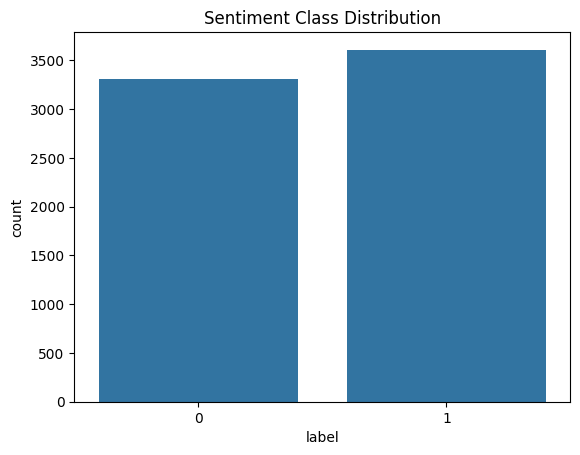

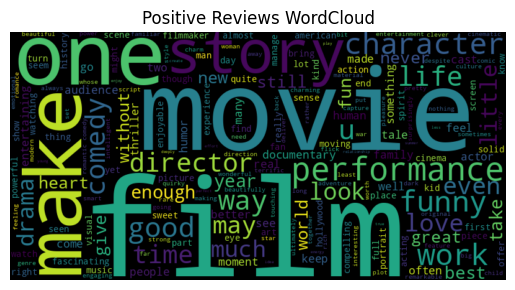

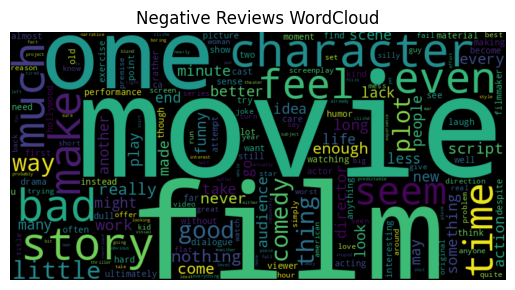

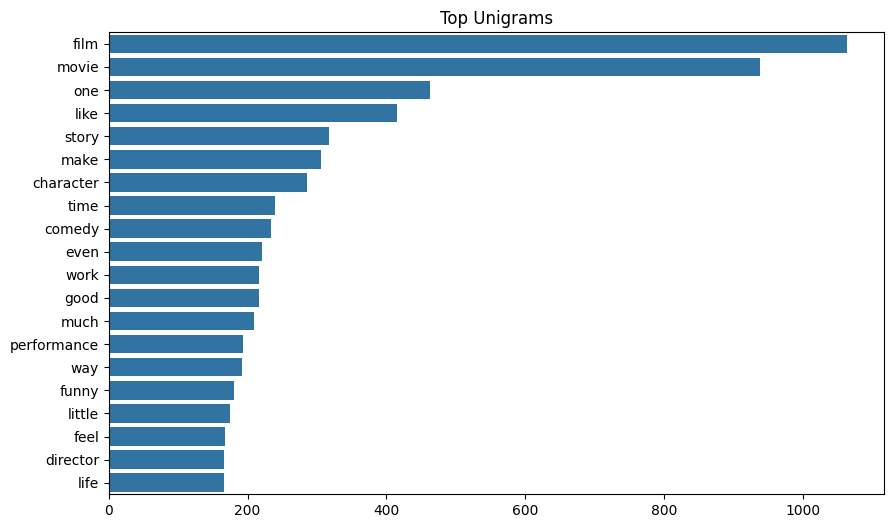

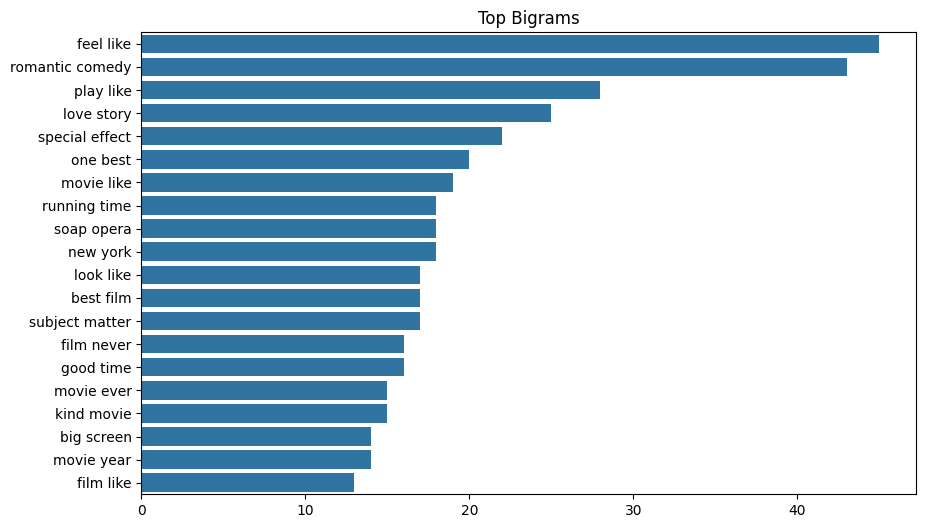

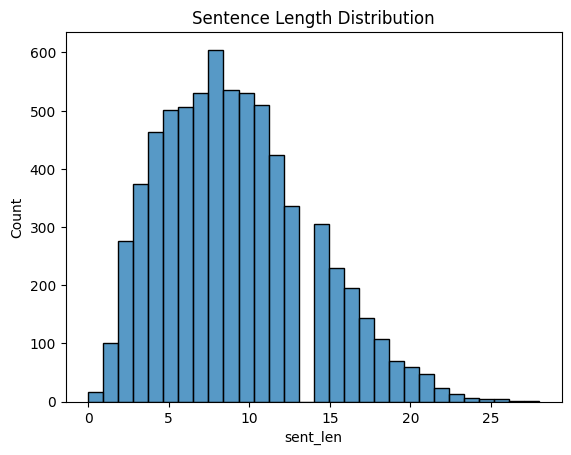

Best Naive Bayes Params: {'alpha': 1.0}
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77       912
           1       0.76      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821

Confusion Matrix:
 [[666 246]
 [141 768]]
Best SVM Params: {'C': 0.1}
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       912
           1       0.77      0.83      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821

Confusion Matrix:
 [[680 232]
 [152 757]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:27:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Params: {'max_depth': 5, 'n_estimators': 100}
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       912
           1       0.67      0.80      0.73       909

    accuracy                           0.70      1821
   macro avg       0.71      0.70      0.70      1821
weighted avg       0.71      0.70      0.70      1821

Confusion Matrix:
 [[545 367]
 [180 729]]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Pretrained Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       912
           1       0.91      0.94      0.92       909

    accuracy                           0.92      1821
   macro avg       0.92      0.92      0.92      1821
weighted avg       0.92      0.92      0.92      1821

Confusion Matrix:
 [[823  89]
 [ 52 857]]

Model Comparison Summary:
          Model  Accuracy  Precision    Recall        F1
0  Naive Bayes  0.787479   0.757396  0.844884  0.798752
1          SVM  0.789127   0.765420  0.832783  0.797682
2      XGBoost  0.699616   0.665146  0.801980  0.727182


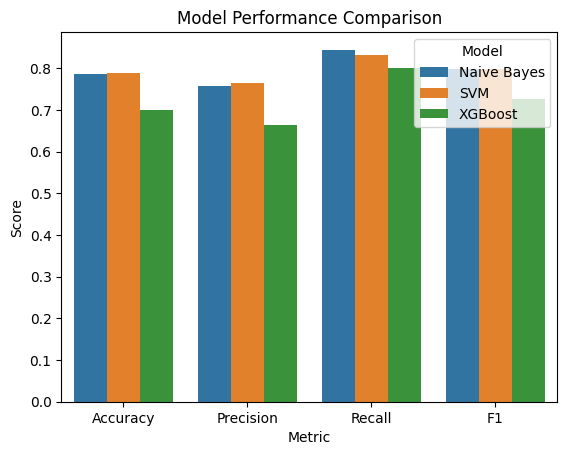

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from transformers import pipeline

# Download necessary NLTK data
nltk.download('punkt_tab')  # Tokenizer for splitting text into words

# load STSA dataset
def load_stsa(filepath):
    labels, texts = [], []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()  # Remove leading/trailing spaces
            if not line:
                continue
            label, text = line.split(' ', 1)  # Split line into label and text
            labels.append(int(label))  # Convert label to integer
            texts.append(text)  # Append text
    return pd.DataFrame({'label': labels, 'text': texts})  # Return as DataFrame

# Load training and testing data
train_df = load_stsa('stsa-train.txt')
test_df = load_stsa('stsa-test.txt')

# Print class distribution of training data
print("Train class distribution:\n", train_df['label'].value_counts())

# Apply SMOTE
if abs(train_df['label'].value_counts(normalize=True)[0] - train_df['label'].value_counts(normalize=True)[1]) > 0.1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(train_df[['text']], train_df['label'])
    train_df = pd.DataFrame({'text': X_res['text'], 'label': y_res})  # Update training data with resampled data
    print("Applied SMOTE. New distribution:\n", train_df['label'].value_counts())

# Download additional NLTK data for processing text
nltk.download('punkt')  # Word tokenization
nltk.download('stopwords')  # Stop words removal
nltk.download('wordnet')  # Lemmatization

# Prepare stop words and lemmatizer for text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# preprocess text: tokenization, removing stop words, and lemmatization
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]  # Remove non-alphabetic and stop words
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize tokens
    return " ".join(tokens)  # Join tokens back into a string

# Apply preprocessing to both training and testing data
train_df['clean_text'] = train_df['text'].apply(preprocess)
test_df['clean_text'] = test_df['text'].apply(preprocess)

# plot the class distribution of labels
def plot_distribution(df):
    sns.countplot(x='label', data=df)  # Count plot for label distribution
    plt.title('Sentiment Class Distribution')
    plt.show()

# Visualize the sentiment class distribution
plot_distribution(train_df)

# Generate a word cloud for positive reviews (label 1)
all_text = " ".join(train_df[train_df['label']==1]['clean_text'])
wc_pos = WordCloud(width=800, height=400).generate(all_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')  # Turn off axis for cleaner display
plt.title('Positive Reviews WordCloud')
plt.show()

# Generate a word cloud for negative reviews (label 0)
all_text = " ".join(train_df[train_df['label']==0]['clean_text'])
wc_neg = WordCloud(width=800, height=400).generate(all_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()

# plot top N-grams (unigrams, bigrams)
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(corpus, ngram_range=(1,1), top_n=20, title='Top N-grams'):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)  # Create vectorizer with specified ngram range
    bag = vec.transform(corpus)  # Transform the corpus into a bag of ngrams
    sum_words = bag.sum(axis=0)  # Sum the occurrences of each ngram
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]  # Get word frequency
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]  # Sort and select top N
    words, freqs = zip(*word_freq)  # Unzip into words and frequencies
    plt.figure(figsize=(10,6))  # Create a figure for the plot
    sns.barplot(x=list(freqs), y=list(words))  # Create a bar plot
    plt.title(title)
    plt.show()

# Plot unigrams and bigrams
plot_ngrams(train_df['clean_text'], (1,1), 20, 'Top Unigrams')
plot_ngrams(train_df['clean_text'], (2,2), 20, 'Top Bigrams')

# Plot the distribution of sentence lengths
train_df['sent_len'] = train_df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['sent_len'], bins=30)
plt.title('Sentence Length Distribution')
plt.show()

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
y_train = train_df['label']
X_test = vectorizer.transform(test_df['clean_text'])
y_test = test_df['label']

# perform grid search and evaluate models
def run_grid(model, params, name):
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)  # Perform grid search with cross-validation
    grid.fit(X_train, y_train)  # Fit the grid search
    best = grid.best_estimator_  # Get the best model from grid search
    print(f"Best {name} Params:", grid.best_params_)
    preds = best.predict(X_test)  # Predict on test data
    print(f"{name} Classification Report:\n", classification_report(y_test, preds))  # Display classification report
    print(f"Confusion Matrix:\n", confusion_matrix(y_test, preds))  # Display confusion matrix
    return best, preds

# Define models to evaluate
models = [
    (MultinomialNB(), {'alpha':[0.5,1.0]}, 'Naive Bayes'),
    (LinearSVC(), {'C':[0.1,1,10]}, 'SVM'),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators':[100,200], 'max_depth':[3,5]}, 'XGBoost')
]
results = {}
for mdl, prm, name in models:
    best_model, preds = run_grid(mdl, prm, name)  # Evaluate each model
    results[name] = {'model': best_model, 'preds': preds}

# Use pre-trained BERT-based sentiment analysis model
classifier = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")
pred_labels = []
for txt in test_df['text']:
    res = classifier(txt)[0]  # Get sentiment prediction for each text
    pred_labels.append(1 if res['label']=='POSITIVE' else 0)

# Display classification report and confusion matrix for the pretrained model
print("Pretrained Model Classification Report:\n", classification_report(y_test, pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))

# Create a summary of the model performance
summary = pd.DataFrame(
    [(name,
      accuracy_score(y_test, res['preds']),
      precision_score(y_test, res['preds']),
      recall_score(y_test, res['preds']),
      f1_score(y_test, res['preds'])) for name, res in results.items()],
    columns=['Model','Accuracy','Precision','Recall','F1']
)

# Print model comparison summary
print("\nModel Comparison Summary:\n", summary)

# Melt the summary for visualization and plot performance comparison
summary_melted = summary.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=summary_melted)
plt.title('Model Performance Comparison')
plt.show()

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score



=== EDA for Train ===
label
1    50.002
0    49.998
Name: percentage, dtype: float64


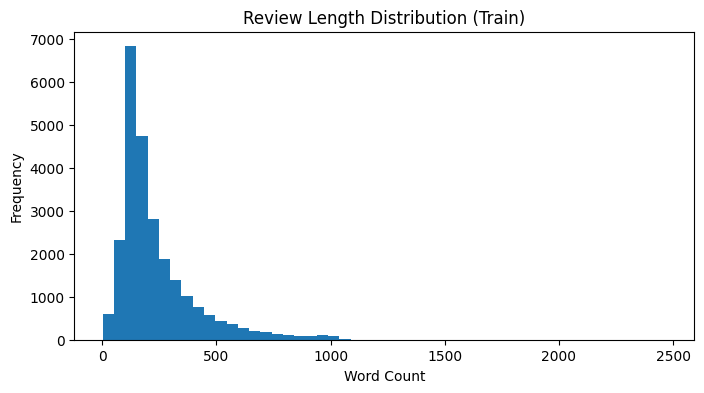


=== EDA for Test ===
label
1    50.002
0    49.998
Name: percentage, dtype: float64


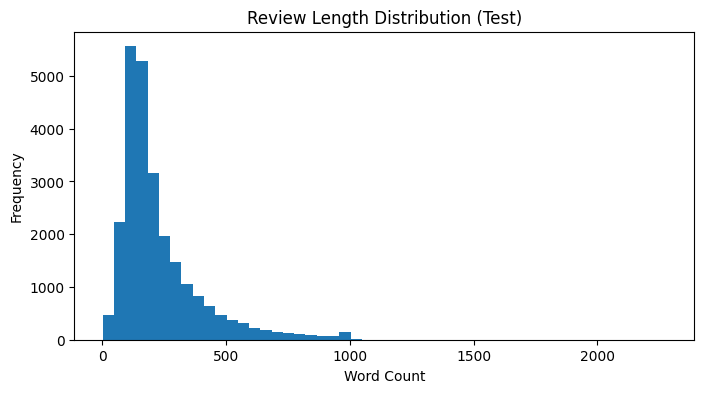


***** KNN *****
KNN CV Accuracy: 0.7169 ± 0.0114

Validation Results:
Accuracy:  0.7113
Precision: 0.6671
Recall:    0.8320
F1 Score:  0.7405

Test Results:
Accuracy:  0.6591
Precision: 0.6355
Recall:    0.7461
F1 Score:  0.6864

***** Decision Tree *****
Decision Tree CV Accuracy: 0.6961 ± 0.0165

Validation Results:
Accuracy:  0.6963
Precision: 0.6967
Recall:    0.6846
F1 Score:  0.6906

Test Results:
Accuracy:  0.6959
Precision: 0.6993
Recall:    0.6876
F1 Score:  0.6934

***** Random Forest *****
Random Forest CV Accuracy: 0.8370 ± 0.0097

Validation Results:
Accuracy:  0.8398
Precision: 0.8373
Recall:    0.8397
F1 Score:  0.8385

Test Results:
Accuracy:  0.8351
Precision: 0.8431
Recall:    0.8235
F1 Score:  0.8332

***** XGBoost *****
XGBoost CV Accuracy: 0.8492 ± 0.0110

Validation Results:
Accuracy:  0.8494
Precision: 0.8289
Recall:    0.8768
F1 Score:  0.8522

Test Results:
Accuracy:  0.8483
Precision: 0.8371
Recall:    0.8649
F1 Score:  0.8508

***** Word2Vec + RandomForest *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings('ignore')
def load_data(train_path, test_path):
    # CSVs have two columns: 0=text, 1=label (0 or 1)
    train_df = pd.read_csv(
        train_path,
        header=None,
        names=['text', 'label'],
        dtype={'label': int},
        encoding='utf-8',
        engine='python'
    )
    test_df = pd.read_csv(
        test_path,
        header=None,
        names=['text', 'label'],
        dtype={'label': int},
        encoding='utf-8',
        engine='python'
    )
    # Ensure text column is string
    train_df['text'] = train_df['text'].astype(str)
    test_df['text']  = test_df['text'].astype(str)
    return train_df, test_df


def eda(df, name):
    print(f"\n=== EDA for {name} ===")
    # Class distribution
    dist = df['label'].value_counts(normalize=True) * 100
    print(dist.rename('percentage'))
    # Text length distribution
    df['length'] = df['text'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(8,4))
    plt.hist(df['length'], bins=50)
    plt.title(f"Review Length Distribution ({name})")
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()


def get_word2vec_embeddings(texts, size=100, window=5, min_count=2, workers=4):
    tokenized = [t.split() for t in texts]
    model = Word2Vec(tokenized, vector_size=size, window=window, min_count=min_count, workers=workers)
    embeddings = []
    for tokens in tokenized:
        vecs = [model.wv[w] for w in tokens if w in model.wv]
        embeddings.append(np.mean(vecs, axis=0) if vecs else np.zeros(size))
    return np.array(embeddings)


def evaluate_cv(name, clf, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    clf.fit(X, y)
    return clf


def evaluate_final(clf, X, y, split_name):
    preds = clf.predict(X)
    print(f"\n{split_name} Results:")
    print(f"Accuracy:  {accuracy_score(y, preds):.4f}")
    print(f"Precision: {precision_score(y, preds):.4f}")
    print(f"Recall:    {recall_score(y, preds):.4f}")
    print(f"F1 Score:  {f1_score(y, preds):.4f}")


def main():
    # File paths
    train_path = 'train_data.csv'
    test_path  = 'test_data.csv'

    # Load and preprocess
    train_df, test_df = load_data(train_path, test_path)

    # Exploratory Data Analysis
    eda(train_df, 'Train')
    eda(test_df, 'Test')

    # Split into train/validation
    X = train_df['text']
    y = train_df['label']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # TF-IDF vectorization
    vectorizer     = TfidfVectorizer(max_features=5000)
    X_train_tfidf  = vectorizer.fit_transform(X_train)
    X_val_tfidf    = vectorizer.transform(X_val)
    X_test_tfidf   = vectorizer.transform(test_df['text'])

    # Classical ML models (SVM removed)
    classical_models = [
        ('KNN',            KNeighborsClassifier()),
        ('Decision Tree',  DecisionTreeClassifier()),
        ('Random Forest',  RandomForestClassifier()),
        ('XGBoost',        XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]

    # Train & evaluate classical models
    for name, clf in classical_models:
        print(f"\n***** {name} *****")
        clf_trained = evaluate_cv(name, clf, X_train_tfidf, y_train)
        evaluate_final(clf_trained, X_val_tfidf, y_val,    'Validation')
        evaluate_final(clf_trained, X_test_tfidf, test_df['label'], 'Test')

    # Word2Vec + RF
    print("\n***** Word2Vec + RandomForest *****")
    X_train_w2v = get_word2vec_embeddings(X_train)
    X_val_w2v   = get_word2vec_embeddings(X_val)
    X_test_w2v  = get_word2vec_embeddings(test_df['text'])
    w2v_clf     = RandomForestClassifier()
    w2v_trained = evaluate_cv('W2V_RF', w2v_clf, X_train_w2v, y_train)
    evaluate_final(w2v_trained, X_val_w2v, y_val,        'Validation')
    evaluate_final(w2v_trained, X_test_w2v, test_df['label'], 'Test')
if __name__ == '__main__':
    main()

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Shape: (10000, 6)
Columns: ['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']
Rating
5    4994
1    2117
4    1381
3     831
2     677
Name: count, dtype: int64
Product Name       0
Brand Name      2527
Price            693
Rating             0
Reviews            1
Review Votes     324
dtype: int64


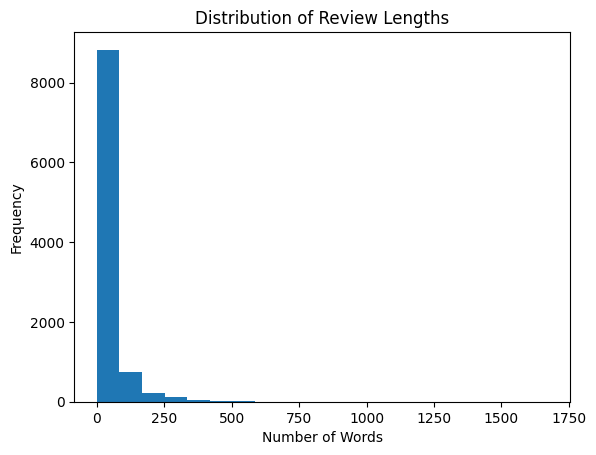

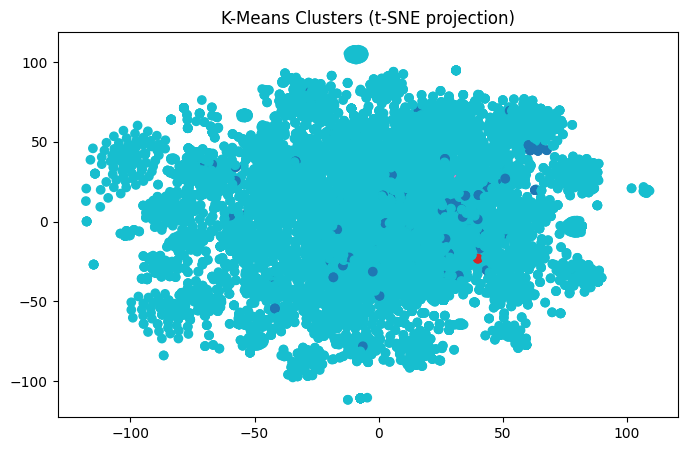

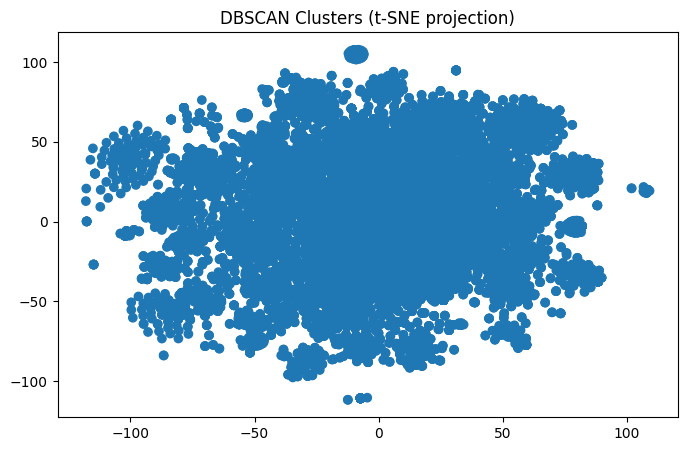

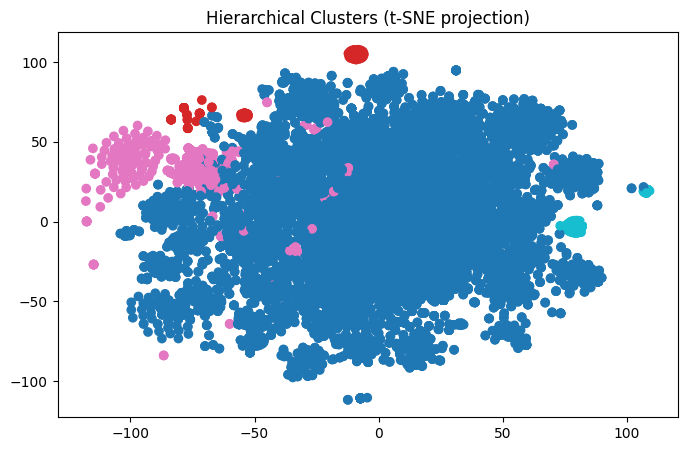

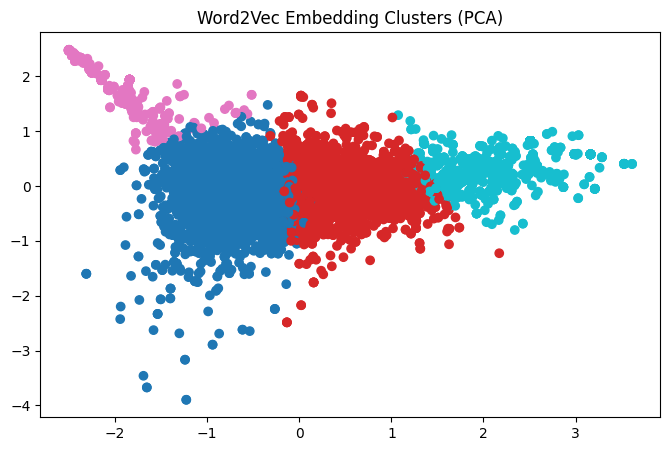

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Load dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
# NOTE: To ensure faster execution, limit the dataset to the first 10,000 rows by using `df = df.head(10000)`.
df = df.head(10000)
# EDA
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df['Rating'].value_counts())

# look at missing values
print(df.isnull().sum())

# Distribution of review lengths
df['review_length'] = df['Reviews'].astype(str).apply(lambda x: len(x.split()))
plt.hist(df['review_length'], bins=20)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

# Apply preprocessing
df['clean_review'] = df['Reviews'].astype(str).apply(preprocess)

# Vectorization: TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df['clean_review'])

# Dimensionality reduction for visualization
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# 1. K-Means Clustering
k = 4  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels_km = kmeans.fit_predict(X_tfidf)

# Visualization of K-Means
plt.figure(figsize=(8,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_km, cmap='tab10')
plt.title('K-Means Clusters (t-SNE projection)')
plt.show()

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=2)
labels_db = dbscan.fit_predict(X_pca)

# Visualization of DBSCAN
plt.figure(figsize=(8,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_db, cmap='tab10')
plt.title('DBSCAN Clusters (t-SNE projection)')
plt.show()

# 3. Hierarchical Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=k)
labels_agg = agg.fit_predict(X_pca)

plt.figure(figsize=(8,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_agg, cmap='tab10')
plt.title('Hierarchical Clusters (t-SNE projection)')
plt.show()

# 4. Word2Vec Embeddings + K-Means
# Tokenize for Word2Vec
sentences = [word_tokenize(text.lower()) for text in df['clean_review']]
# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, seed=42)
# Compute average embedding per review
def avg_embedding(tokens, model):
    vecs = [model.wv[t] for t in tokens if t in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

embeddings = np.array([avg_embedding(sent, w2v_model) for sent in sentences])

# K-Means on Word2Vec embeddings
kmeans_w2v = KMeans(n_clusters=k, random_state=42)
labels_w2v = kmeans_w2v.fit_predict(embeddings)

# Visualization
pca_w2v = PCA(n_components=2, random_state=42)
emb_tsne = pca_w2v.fit_transform(embeddings)

plt.figure(figsize=(8,5))
plt.scatter(emb_tsne[:,0], emb_tsne[:,1], c=labels_w2v, cmap='tab10')
plt.title('Word2Vec Embedding Clusters (PCA)')
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

The results from the different clustering methods show some interesting differences. K-Means creates clusters, but they are spread out and overlap a lot, which makes it hard to clearly see where one cluster ends and another begins. DBSCAN, however, groups most of the data into one large cluster, showing its ability to handle noise, but it doesn't separate the data as well. Hierarchical clustering does a better job of forming more defined clusters, with clearer boundaries, although there's still some overlap. Word2Vec produces the best results, creating tight clusters that reflect the meaning of the words in the reviews. K-Means and DBSCAN have less clear groupings, while Hierarchical and Word2Vec are more effective at creating useful clusters.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

